#모듈설치

In [ ]:
!pip install mxnet
!pip install gluonnlp pandas tqdm
!pip install sentencepiece
!pip install transformers==3.0.2
!pip install torch

     |████████████████████████████████| 47.3 MB 1.7 MB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 344 kB 7.1 MB/s 
  Created wheel for gluonnlp: filename=gluonnlp-0.10.0-cp37-cp37m-linux_x86_64.whl size=595732 sha256=8924c9f5b87e09455ad854e22404d0c5788b4ac3c729d75b468fb9da77e26c16
  Stored in directory: /root/.cache/pip/wheels/be/b4/06/7f3fdfaf707e6b5e98b79c041e023acffbe395d78a527eae00
Successfully built gluonnlp
     |████████████████████████████████| 1.2 MB 8.3 MB/s 
     |████████████████████████████████| 769 kB 8.7 MB/s 
     |████████████████████████████████| 895 kB 42.6 MB/s 
     |████████████████████████████████| 3.0 MB 43.2 MB/s 


In [ ]:
!pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

  Cloning https://****@github.com/SKTBrain/KoBERT.git (to revision master) to /tmp/pip-req-build-1u_mpnmt
  Running command git clone -q 'https://****@github.com/SKTBrain/KoBERT.git' /tmp/pip-req-build-1u_mpnmt
     |████████████████████████████████| 131 kB 7.4 MB/s 
     |████████████████████████████████| 4.5 MB 48.1 MB/s 
     |████████████████████████████████| 3.4 MB 21.8 MB/s 
     |████████████████████████████████| 596 kB 45.1 MB/s 
     |████████████████████████████████| 3.3 MB 19.5 MB/s 
     |████████████████████████████████| 67 kB 5.5 MB/s 
     |████████████████████████████████| 8.5 MB 43.7 MB/s 
     |████████████████████████████████| 79 kB 7.7 MB/s 
     |████████████████████████████████| 127 kB 58.2 MB/s 
  Created wheel for kobert: filename=kobert-0.2.3-py3-none-any.whl size=15449 sha256=70bc07fd07387b709cfd6490f0dc6913ab21a4add476c533ba57446b10c7ad5d
  Stored in directory: /tmp/pip-ephem-wheel-cache-8v5svuoi/wheels/d3/68/ca/334747dfb038313b49cf71f84832a33372f3470d9ddfd05

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
import numpy as np
from tqdm import tqdm, tqdm_notebook

In [ ]:
#kobert
from kobert.utils import get_tokenizer
from kobert.pytorch_kobert import get_pytorch_kobert_model

#transformers
from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

In [ ]:
#GPU 사용
device = torch.device("cuda:0")

#BERT 모델, Vocabulary 불러오기
bertmodel, vocab = get_pytorch_kobert_model()

/content/.cache/kobert_v1.zip[██████████████████████████████████████████████████]
/content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece[██████████████████████████████████████████████████]


In [ ]:
#토큰화
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

using cached model. /content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [ ]:
# Setting parameters
max_len = 64
batch_size = 64
warmup_ratio = 0.1
num_epochs = 5
max_grad_norm = 1
log_interval = 200
learning_rate =  5e-5

#데이터 불러오기
- 트위치 스트리머 17명 인스타그램 댓글을 크롤링한 데이터

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving acau.csv to acau.csv
Saving ambition.csv to ambition.csv
Saving angry.csv to angry.csv
Saving berry.csv to berry.csv
Saving CharmingJo.csv to CharmingJo.csv
Saving gangg.csv to gangg.csv
Saving garybro.csv to garybro.csv
Saving jihwan.csv to jihwan.csv
Saving kimblue.csv to kimblue.csv
Saving kimjaewon.csv to kimjaewon.csv
Saving mirage.csv to mirage.csv
Saving oking.csv to oking.csv
Saving rnsflaqh.csv to rnsflaqh.csv
Saving ruswkgml.csv to ruswkgml.csv
Saving sebom.csv to sebom.csv
Saving silph.csv to silph.csv
Saving taejun.csv to taejun.csv


In [ ]:
import pandas as pd
df1 = pd.read_csv('/content/CharmingJo.csv')[['댓글']]
df2 = pd.read_csv('/content/acau.csv')[['댓글']]
df3 = pd.read_csv('/content/ambition.csv')[['댓글']]
df4 = pd.read_csv('/content/angry.csv')[['댓글']]
df5 = pd.read_csv('/content/berry.csv')[['댓글']]
df6 = pd.read_csv('/content/gangg.csv')[['댓글']]
df7 = pd.read_csv('/content/garybro.csv')[['댓글']]
df8 = pd.read_csv('/content/jihwan.csv')[['댓글']]
df9 = pd.read_csv('/content/kimblue.csv')[['댓글']]
df10 = pd.read_csv('/content/kimjaewon.csv')[['댓글']]
df11 = pd.read_csv('/content/mirage.csv')[['댓글']]
df12 = pd.read_csv('/content/oking.csv')[['댓글']]
df13 = pd.read_csv('/content/rnsflaqh.csv')[['댓글']]
df14 = pd.read_csv('/content/ruswkgml.csv')[['댓글']]
df15 = pd.read_csv('/content/sebom.csv')[['댓글']]
df16 = pd.read_csv('/content/silph.csv')[['댓글']]
df17 = pd.read_csv('/content/taejun.csv')[['댓글']]

In [ ]:
df_list = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17]

In [ ]:
df = pd.concat(df_list,ignore_index=True)

In [ ]:
def clean(text) :

  import re
  pattern1 = re.compile(r"[^ A-Za-z0-9가-힣]+")
  pattern2 = re.compile(r"(.)\1{2,}")
  pattern3 = re.compile(r"\s+")

  text = pattern1.sub("", str(text))
  text = pattern2.sub(r"\1" * 2, str(text))
  text = pattern3.sub(" ", str(text))

  return text.strip()

In [ ]:
df['댓글'] = [clean(c) for c in df['댓글']]
df['댓글']

0                        원노트삼바
1       곧 있으면 재즈클럽에 공연하러 다니겠구만
2                      원 노트 삼발
3                 비디오키즈챠밍조도빠둥이
4                  재즈계의 발을 내딛다
                 ...          
5168        0210211 이제 돼준이 아니야
5169                슈퍼릿 신상 이뻐여
5170                      잘생겼다
5171                       기엽누
5172                       귀염땅
Name: 댓글, Length: 5173, dtype: object

#KoBERT 모델 불러오기 + 크롤링데이터 라벨링

In [ ]:
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, max_len,
                 pad, pair):
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len, pad=pad, pair=pair)

        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

In [ ]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=3,   ##클래스 수 조정##
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

In [ ]:
model = torch.load('/content/drive/MyDrive/CP22/model2.pt')
model.load_state_dict(torch.load('/content/drive/MyDrive/CP22/model_state_dict2.pt'))

<All keys matched successfully>

In [ ]:
def test2(comment) :
  cmtlist=[]
  sent = []
  for c in comment :
    cmtlist.append( [c, 5]) #[댓글, 임의의 양의 정수]

  cmtData = pd.DataFrame(cmtlist, columns = [['comments', 'label']])
  cmtData = cmtData.values
  test_set = BERTDataset(cmtData, 0, 1, tok, max_len, True, False)
  test_input = torch.utils.data.DataLoader(test_set, batch_size = batch_size, num_workers=2)

  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(test_input) :
    token_ids = token_ids.long().to(device)
    segment_ids = segment_ids.long().to(device)
    valie_length = valid_length
    #예측 결과 리스트 : out
    out = model(token_ids, valid_length, segment_ids)

    for e in out :
      if max(e) == e[0]:
        value = 0
      elif max(e) == e[1] :
        value = 1
      elif max(e) == e[2] :
        value = 2
      sent.append(value)

  return sent

In [ ]:
testlist = df['댓글'].tolist()

testlist2 = list(map(str, testlist))

In [ ]:
test_label_list = test2(testlist2)

In [ ]:
df_label = pd.DataFrame({
    'comments' : testlist2,
    'label' : test_label_list
})

In [ ]:
df_label.label.value_counts()

1    4441
0     514
2     218
Name: label, dtype: int64

In [ ]:
df_insta = df_label

#비율검정
- 팬심의 채팅 데이터와 트위치 스트리머의 인스타그램 댓글의 긍정/부정 비율 검정

In [ ]:
df_fancim = pd.read_csv('/content/drive/MyDrive/CP22/[jh]labeled_data_0113_new.csv')

In [ ]:
df_fancim.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [ ]:
df_fancim['comments'] = [clean(c) for c in df_fancim['comments']]

In [ ]:
df_fancim

,date,time,celeb,code,comments,file,label
0,2021-07-12,20:39,VAYA,KAMF,님이 참여했습니다,NaN,1
1,2021-07-12,20:40,VAYA,KAMF,사랑해요,NaN,2
2,2021-07-12,20:40,VAYA,MLSC,님이 참여했습니다,NaN,1
3,2021-07-12,20:41,VAYA,ZSOS,님이 참여했습니다,NaN,1
4,2021-07-12,20:41,VAYA,MLSC,단톡 전용 인스타 대체일지 자려고했는데 파들,NaN,1
...,...,...,...,...,...,...,...
10292,2021-08-18,08:56,JOPU,BYZG,오늘도 비가 주륵주륵 벼보리님 우산 잘 쓰고 다니셔요,NaN,1
10293,2021-08-18,17:38,JOPU,JOPU,Operator오늘은 수요일 스팀겜 하는 날 일주일의 절반이 벌써 다가왔네요 저는 ...,NaN,1
10294,2021-08-18,18:03,JOPU,CCAA,재밌는시간 보내셨겠네요 저는 학교갔는데 생각했던것보단 정겹고 좋네요 은근 아그리고오...,NaN,1
10295,2021-08-18,18:15,JOPU,ZWYM,보리쟝이무화과를 먹었으니 저는 복숭아를 먹겠읍니다 후후푹 쉬고 7시에 방송에서 봐용,NaN,1


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
fancim_label = df_fancim.groupby('label').count().reset_index()[['label', 'comments']]

In [ ]:
insta_label = df_insta.groupby('label').count().reset_index()[['label', 'comments']]

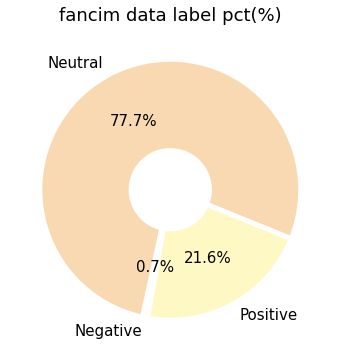

In [ ]:
fig = plt.figure(figsize=(10,6)) 
fig.set_facecolor('white') 
ratio = fancim_label['comments']
labels = ['Negative','Neutral','Positive']
colors = ['#fff38b', '#f9d9b1', '#fef8c5']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.rc('font', size=15)  

#fff38b
#fef8c5
#f9d9b1

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.title("fancim data label pct(%)")
plt.show()

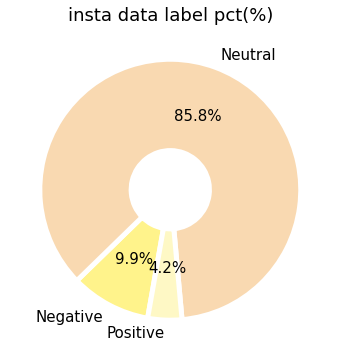

In [ ]:
fig = plt.figure(figsize=(10,6)) 
fig.set_facecolor('white') 
ratio = insta_label['comments']
labels = ['Negative','Neutral','Positive']
colors = ['#fff38b', '#f9d9b1', '#fef8c5']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.rc('font', size=15)  

#fff38b
#fef8c5
#f9d9b1

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.title("insta data label pct(%)")
plt.show()

- 원그래프상에서 긍정/부정의 차이가 많이 있지만, 일반적으로 그렇다고 할 수 있는지 검정  
  
    - 가설 :팬심데이터의 긍정비율이 인스타그램 댓글의 긍정비율보다 높다고 할 수 있을까.  
$H_0$:팬심데이터와 인스타그램 댓글의 긍정비율은 차이가 없다.  
$H_1$:팬심데이터의 긍정 비율이 인스타그램 댓글의 긍정비율보다 높다.

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
print(df_fancim.label.value_counts())
print(len(df_fancim))
print('-'*40)
print(df_insta.label.value_counts())
print(len(df_insta))

1    8001
2    2229
0      67
Name: label, dtype: int64
10297
----------------------------------------
1    4441
0     514
2     218
Name: label, dtype: int64
5173


In [ ]:
count = np.array([2229, 514])
nobs = np.array([10297, 5173])

In [ ]:
z, p = proportions_ztest(count = count, nobs = nobs, value = .05)

In [ ]:
print('{0:0.3f}'.format(p))

0.000


- p-value < 유의수준이므로 귀무가설 기각.   
팬심데이터의 긍정 비율이 인스타그램 댓글의 긍정비율보다 높다고 할 수 있다.
